In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df2 = df.drop ( ['No', 'X1 transaction date'], axis = 1)

# Separate x,y

In [20]:
x = df2.drop (['Y house price of unit area'], axis = 1)

In [21]:
x.head ()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [22]:
y = df ['Y house price of unit area']

In [23]:
y.head ()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [24]:
x.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

# Transformation

In [25]:
from sklearn.preprocessing import MaxAbsScaler

In [26]:
scaler = MaxAbsScaler ()

In [27]:
scaler_fit = scaler.fit_transform (x)

In [28]:
scaler_fit

array([[0.73059361, 0.01308239, 1.        , 0.99873634, 0.99978588],
       [0.44520548, 0.0472555 , 0.9       , 0.9986308 , 0.99977987],
       [0.30365297, 0.08661879, 0.5       , 0.99891543, 0.99981607],
       ...,
       [0.42922374, 0.06026022, 0.7       , 0.99858642, 0.99978275],
       [0.18493151, 0.0161544 , 0.5       , 0.99808712, 0.99978942],
       [0.14840183, 0.01394201, 0.9       , 0.99839054, 0.9998094 ]])

In [30]:
df3 = pd.DataFrame (scaler_fit, columns = ['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

In [31]:
df3.head ()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.730594,0.013082,1.0,0.998736,0.999786
1,0.445205,0.047256,0.9,0.998631,0.999780
2,0.303653,0.086619,0.5,0.998915,0.999816
3,0.303653,0.086619,0.5,0.998915,0.999816
4,0.114155,0.060198,0.5,0.998592,0.999804


In [32]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

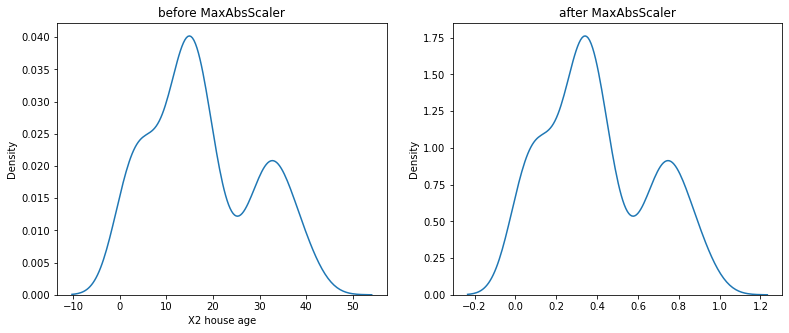

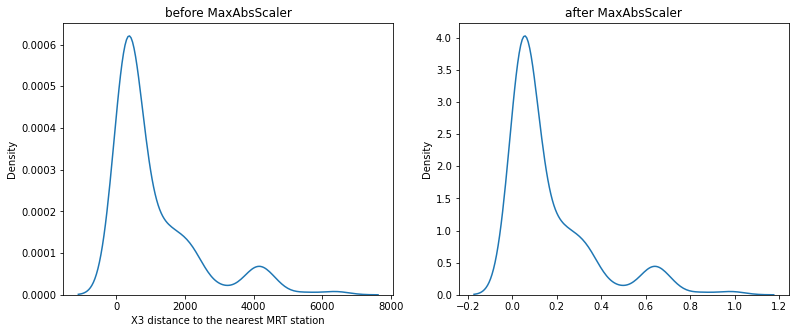

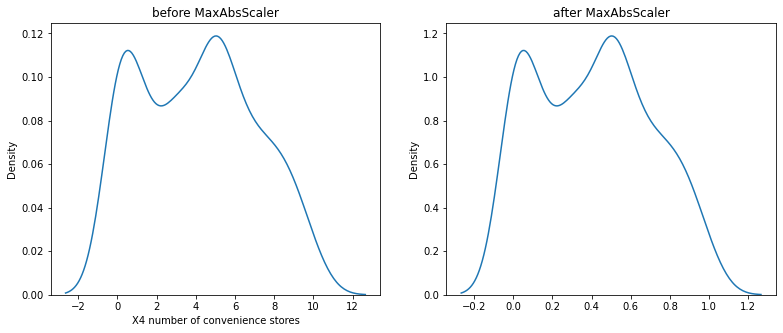

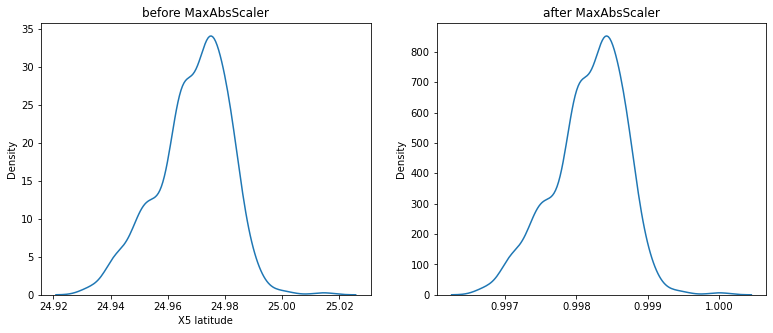

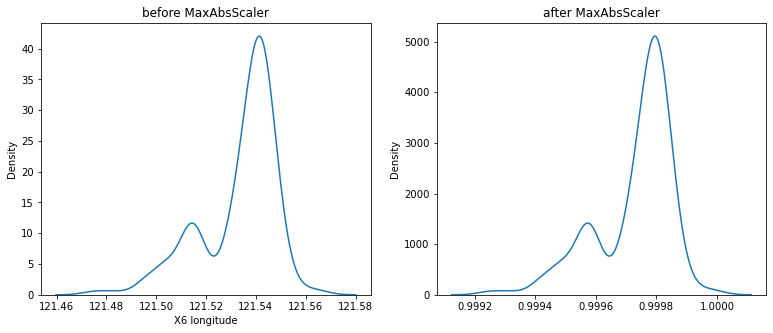

In [39]:
for col in x.columns:
    plots(x, col, MaxAbsScaler ())

# train_test_split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split (x,y, test_size = .30, random_state = 0)

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression ()

In [45]:
reg_fit = reg.fit (xtrain,ytrain)

In [46]:
y_output = reg_fit.predict ([[19.5,306.59470,9, 24.98034,121.53951]])

In [47]:
y_output

array([49.13044709])

In [50]:
reg.coef_

array([-2.80567822e-01, -4.34636411e-03,  1.04820149e+00,  2.45047983e+02,
       -6.05315432e+00])

In [52]:
reg.intercept_

-5339.18424291998

# Linear Regression with Multiple Variables Calculation

In [53]:
y = -2.80567822e-01 * 19.5 + -4.34636411e-03 * 306.59470 + 1.04820149e+00 * 9 + 2.45047983e+02 * 24.98034 + -6.05315432e+00 * 121.53951 + -5339.18424291998

In [54]:
y

49.13044740766145

In [55]:
from sklearn.metrics import r2_score

In [61]:
y_output = reg.predict(xtest)
score = r2_score(ytest,y_output) 

In [62]:
score

0.5681018510026289